# Jan 23, 2023

### Set-up

In [1]:
# set path
REPO_PATH = r"C:\Users\micha\projects\v1_v4_1024"
PROJECT_PATH = 'G:/Shared drives/v1_v4_1024/'

In [2]:
# add import here

# general
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# lab
from fooof import FOOOFGroup

# project
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_psd_diff
from scripts.utils import comp_psd_diff

In [3]:
# Settings
SESSIONS = ['L_SNR_250717','A_SNR_140819'] # List of sessions to analyze
FS = 500 # sampling frequency (Hz)
N_ARRAYS = 16 # number of arrays

#### examine spectra output for an example file

In [4]:
# dir_input = f"{PROJECT_PATH}/data/lfp/lfp_psd/{SESSIONS[i_sessions]}"
# files = os.listdir(dir_input)

In [5]:
# load psd

# pick example file
i_sessions = 0
i_array = 6
nps_idx = (i_array+1) // 2
print(nps_idx)

# load
fname_in = f"{PROJECT_PATH}/data/lfp/lfp_psd/{SESSIONS[i_sessions]}/NSP{nps_idx}_array{i_array}_LFP_XXX.npz"
psd_pre = np.load(fname_in.replace('XXX', 'pre'))
psd_post = np.load(fname_in.replace('XXX', 'post'))

# print file info
print(psd_pre.files)
print(psd_pre['spectra'].shape)

3
['spectra', 'freq']
(66, 64, 126)


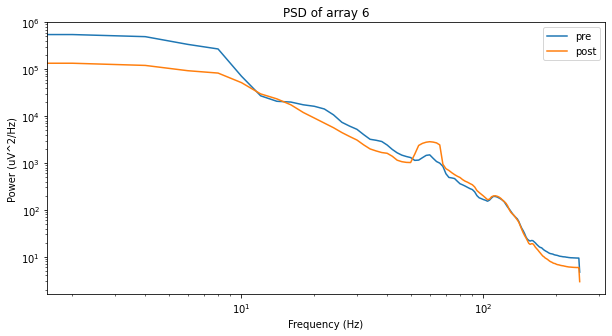

In [6]:
# plot mean psd
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.loglog(psd_post['freq'], np.mean(psd_pre['spectra'], axis=(0,1)), label='pre')
ax.loglog(psd_post['freq'], np.mean(psd_post['spectra'], axis=(0,1)), label='post')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power (uV^2/Hz)')
ax.set_title(f"PSD of array {i_array}")
ax.legend();


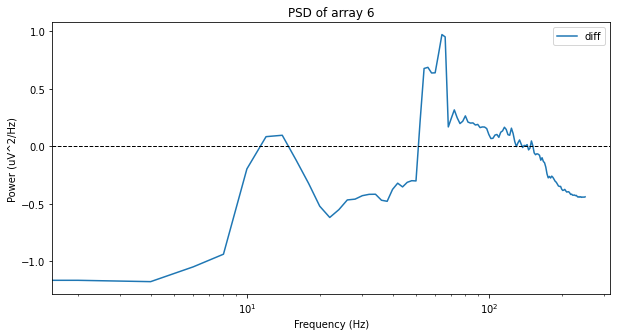

In [7]:
# compute differnce of log psd and plot

# compute log psd
log_psd_pre = np.log(psd_pre['spectra'])
log_psd_post = np.log(psd_post['spectra'])

# compute difference
log_psd_diff = log_psd_post - log_psd_pre

# plot log psd
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(psd_post['freq'], np.mean(log_psd_diff, axis=(0,1)), label='diff')

# label
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power (uV^2/Hz)')
ax.set_title(f"PSD of array {i_array}")
ax.legend()

# annotate power=0
ax.axhline(0, color='k', linestyle='--', linewidth=1)

# scale x-axis logarithmically
ax.set(xscale="log");

In [8]:
# these have been developed into functions within the modules scripts.utils.py and scripts.plots.py

# def comp_psd_diff(psd_pre, psd_post):
#     """
#     Compute the difference of log psd.
    
#     Parameters
#     ----------
#     psd_pre : array
#         Array of pre-stimulus psd.
#     psd_post : array
#         Array of post-stimulus psd.

#     Returns
#     -------
#     log_psd_diff : array
#         Array of log psd difference.
    
#     """
    
#     # compute log psd
#     log_psd_pre = np.log(psd_pre)
#     log_psd_post = np.log(psd_post)
    
#     # compute difference
#     log_psd_diff = log_psd_post - log_psd_pre

#     return log_psd_diff

# def plot_psd_diff(freq, psd_diff):
#     """ Plot spectra (or spectral difference) in semi-log space."""
#     # plot psd
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#     ax.plot(freq, psd_diff.T, color='grey')

#     # plot mean
#     ax.plot(freq, psd_diff.mean(axis=0), color='k', linewidth=3)

#     # label
#     ax.set_xlabel('Frequency (Hz)')
#     ax.set_ylabel('Power (uV^2/Hz)')
#     ax.set_title(f"Power spectrum difference")

#     # annotate power=0
#     ax.axhline(0, color='r', linestyle='--', linewidth=3)

#     # scale x-axis logarithmically
#     ax.set(xscale="log");

#     return fig, ax

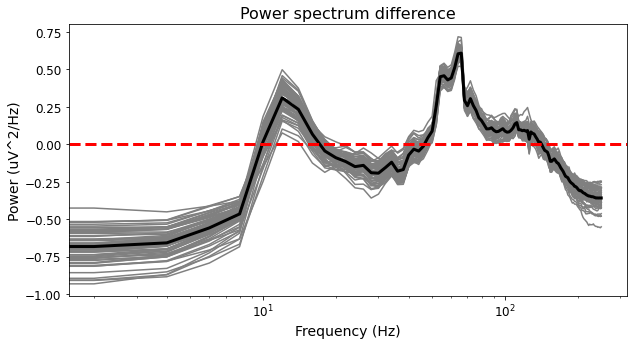

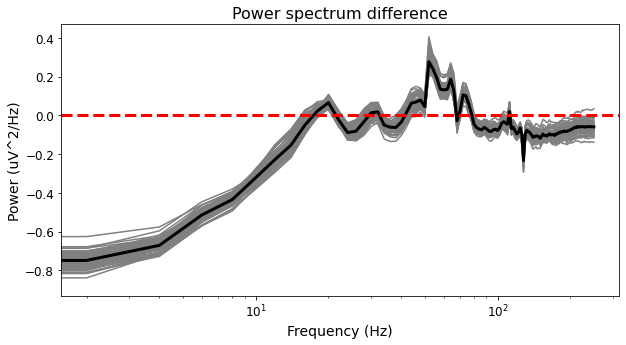

In [9]:
# compute log psd difference for all arrays

for i_session in range(len(SESSIONS)):
    # initialize
    temp = np.load(f"{PROJECT_PATH}/data/lfp/lfp_psd/{SESSIONS[i_session]}/NSP1_array1_LFP_pre.npz")
    log_psd_diff = np.zeros(np.hstack([N_ARRAYS, temp['spectra'].shape]))

    # loop over sessions
    for i_array in range(N_ARRAYS):
        # load psd
        nps_idx = (i_array+2) // 2
        fname_in = f"{PROJECT_PATH}/data/lfp/lfp_psd/{SESSIONS[i_session]}/NSP{nps_idx}_array{i_array+1}_LFP_XXX.npz"
        psd_pre = np.load(fname_in.replace('XXX', 'pre'))
        psd_post = np.load(fname_in.replace('XXX', 'post'))

        # compute log psd difference
        log_psd_diff[i_array] = comp_psd_diff(psd_pre['spectra'], psd_post['spectra'])

    # plot log psd difference for all arrays
    fname_out = f"{PROJECT_PATH}/figures/lfp_psd_diff/{SESSIONS[i_session]}_psd_diff.png"
    plot_psd_diff(psd_pre['freq'], np.mean(log_psd_diff, axis=(0,1)), fname_out=fname_out)

